# Выпускной проект на тему "Анализ оттока клиентов банка"

## Оглавление

1. [Цель проекта](#objective)
2. [Задачи проекта](#tasks)
3. [Описание данных](#describe)
4. [Анализ данныз](#analysis)
5. [Финальный портрет](#final)

<a id="objective"></a>
## Цель

Проанализировать клиентов регионального банка, составив портрет клиента склонного к прекращению сотрудничества и сформулировать рекомендации по сокращению числа уходов.

<a id="tasks"></a>
## Задачи

1. Выгрузить и подготовить данных к анализу;
2. Проанализировать исходных данных;
3. Сформулировать и проверить гипотезы влияния определенных параметров клиента банка на его потенциальный уход;
4. Сформулировать финальный вывод;
5. Подготовить презентацию.

<a id="describe"></a>
## Описание данных

Датасет содержит данные о клиентах банка. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

<a id="analysis"></a>
### Выгрузка и подготовка данных к анализу

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from scipy import stats as st
import numpy as np
import plotly.graph_objects as go

In [2]:
#Выгрузим базу данных в переменную data. Учтём, что датасет может быть выгружен локально
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')
except:    
    data = pd.read_csv('/dataseets/bank_dataset.csv')

In [3]:
#Выведем первые 10 строк датасета
data.head(10)

userid  score            City Gender  Age  Objects    Balance  Products  \
0  15677338    619       Ярославль      Ж   42        2        NaN         1   
1  15690047    608         Рыбинск      Ж   41        1   83807.86         1   
2  15662040    502       Ярославль      Ж   42        8  159660.80         3   
3  15744090    699       Ярославль      Ж   39        1        NaN         2   
4  15780624    850         Рыбинск      Ж   43        2  125510.82         1   
5  15616748    645         Рыбинск      М   44        8  113755.78         2   
6  15635267    822       Ярославль      М   50        7        NaN         2   
7  15698884    376  Ростов Великий      Ж   29        4  115046.74         4   
8  15835101    501       Ярославль      М   44        4  142051.07         2   
9  15635125    684       Ярославль      М   27        2  134603.88         1   

   CreditCard  Loyalty  estimated_salary  Churn  
0           1        1         101348.88      1  
1           0        1         112542.58      0  
2           1        0         113931.57      1  
3           0        0          93826.63      0  
4           1        1          79084.10      0  
5           1        0         149756.71      1  
6           1        1          10062.80      0  
7           1        0         119346.88      1  
8           0        1          74940.50      0  
9           1        1          71725.73      0

Сразу можем заметить, что наименования колонок *не соответсвуют хорошему тону написания*: есть несколько заглавных букв в наименованиях, часть наименований колонок тяжело читаются. Приведем колонки к нижнему регистру и переименуем некоторые из их для удобства работы.

In [4]:
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid':'user_id', 'creditcard':'credit_card'})

In [5]:
#Выведем общую информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


По общей информации можно увидеть:

1) Всего **10000 записей**;\
2) Всего **12 колонок**;\
3) Представленно **3 типа данных**: *целые числа*, *дробные числа*, *строковые значения*;\
4) Присутвуют **пропуски** в колонке *balance*. Далее в работе заменим значения, либо оставим их в датасете.

Узнаем, совпадает ли количество записей с количеством клиентов.

In [6]:
#Посчитаем уникальное количество пользователей в колонке user_id
print('Количество клиентов банка: {}'.format(data['user_id'].nunique()))

Количество клиентов банка: 10000


Посчитаем количество уникальных значений в каждой из колонке, проверив на дубликаты.

In [7]:
#циклом пройдемся по каждой колонке и выведем информацию об уникальных значений в каждой колонке. 
for column in data:
    print(f'Количество уникальных значений в колонке {column} : {data[column].nunique()} штук')

Количество уникальных значений в колонке user_id : 10000 штук
Количество уникальных значений в колонке score : 460 штук
Количество уникальных значений в колонке city : 3 штук
Количество уникальных значений в колонке gender : 2 штук
Количество уникальных значений в колонке age : 70 штук
Количество уникальных значений в колонке objects : 11 штук
Количество уникальных значений в колонке balance : 6381 штук
Количество уникальных значений в колонке products : 4 штук
Количество уникальных значений в колонке credit_card : 2 штук
Количество уникальных значений в колонке loyalty : 2 штук
Количество уникальных значений в колонке estimated_salary : 9999 штук
Количество уникальных значений в колонке churn : 2 штук


На основе полученных данных, делаем выводы:

1) В датасете представленно *10000 пользователей*;\
2) Всего представленно *460 наборов скорринговых оценок*. Некоторые оценки совпадают у ряда клиентов;\
3) Представленно *3 города*, как и описано в условиях поставленной задачи;\
4) Представленно *2 пола*;\
5) Всего представленно *70 возрастных групп*. У ряда клиентов совпадает возраст;\
6) Всего представленно *11 групп количество объектов*. У ряда клиентов совпадает количество объектов в собственности;\
7) А датасете представленно *6381 групп уровня баланса клиента*. У ряда клиентов может совпадать уровень баланса в банке;\
8) Представленно *4 группы количества банковских продуктов*, которыми пользуется клиент;\
9) Всего представленно *2 значения в колонке с наличием кредитных карт*: она либо есть, либо её нет;\
10) Представленно *9999 уникальных значений уровня заработной платы*. Скорее всего, у двух клиентов банка одинаковый уровень заработной платы;\
11) Всего *2 значения статуса клиента*: либо он ушел, либо остался.

Для финальной проверки дубликатов, проверим, есть ли полностью одинаковые строки в датасете. 

In [8]:
data[data.duplicated()]

Empty DataFrame
Columns: [user_id, score, city, gender, age, objects, balance, products, credit_card, loyalty, estimated_salary, churn]
Index: []

Объеденив полученные данные выше, делаем вывод : **дубликаты отсутствуют**.

Далее по работе для удобства анализа переименуем значения в колонке со статусом : *0 - клиент остался*, *1 - клиент ушел*. В таком же ключе заменим значения в колонке с активностью : *0 - не активный*, *1 - активный*. С наличием кредитной карты : *0 - нет кредитной карты*, *1 - есть кредитная карта*. 

In [9]:
#сохраним обработанный датафрейм в новый. Он понадобится для дальнейшего анализа
data_corr = data.copy()

In [10]:
data['churn'] = data['churn'].replace(0, 'Остались')
data['churn'] = data['churn'].replace(1, 'Ушли')
data['loyalty'] = data['loyalty'].replace(0, 'Не активный')
data['loyalty'] = data['loyalty'].replace(1, 'Активный')
data['credit_card'] = data['credit_card'].replace(0, 'Нет кредитной карты')
data['credit_card'] = data['credit_card'].replace(1, 'Есть кредитная карты')

### Анализ исходных данных

Начнем анализ с общей картины *оставшихся* и *ушедших* клиентов. Сгруппируем данные по статусу клиента и построим график.

In [11]:
# Сгруппируем данные по статусу в колонке churn и посчитаем количество клиентов
data_churn = data.pivot_table(index='churn', values='user_id', aggfunc='count').\
    reset_index().\
    sort_values(by='user_id', ascending=False)
data_churn.columns = ['churn', 'qty']
data_churn

churn   qty
0  Остались  7963
1      Ушли  2037

In [12]:
# Изобразим график соотношения количества и посмотрим на доли
fig = px.pie(data_churn, values='qty', names='churn', title='Соотношение количества оставшихся клиентов и ушедших')
fig.show()

Порядка **20%** (2037 шт) клиентов банка ушли. Это достаточно большой показатель по результатам эффективности работы банка. 

Посмотрим на количество ушедших и оставшихся клиентов в разрезе различных показателей. 

In [13]:
#Для удобства создадим функцию, которая будет группировать датасет по различным критериям и будет возвращать
#сгруппированный датасет, на основе которого будет строиться различные графики
def pivot(category):
#Группируем данные и считаем количество клиентов    
    data_pivot = data.pivot_table(index=[category, 'churn'], values='user_id', aggfunc='count').reset_index()
#Сортируем по убыванию количества клиентов    
    data_pivot = data_pivot.sort_values(by='user_id', ascending=False)
#Переименуем колонки для удобства    
    data_pivot.columns = [category, 'churn', 'qty']
#Посчитаем долю 
    data_pivot['share,%'] = round(data_pivot['qty']/data_pivot['qty'].sum()*100,2)
    return data_pivot

In [14]:
#Посмтроим гистограмму по городам в разрезе статуса клиентов
data_city = pivot('city')
px.bar(data_city, x='city', y='share,%', color='churn', hover_data=['qty'], title='График доли клиентов по городам в разрезе статуса')

По данному графику можем наблюдать, что самое большое количество клиентов в *городе Ярославль*. Однако, наибольшее число и доля **ушедших** клиентов в *городе Ростов Великий* - **814 клиентов**(8.14% от общего числа клиентов). 

In [15]:
#Посмтроим гистограмму по полу в разрезе статуса клиентов
data_gender = pivot('gender')
px.bar(data_gender, x='gender', y='share,%', color='churn', hover_data=['qty'], title='График доли клиентов по полу в разрезе статуса')

По данному графику можем наблюдать, что самое большое количество клиентов *мужского пола*. Однако, наибольшее число и доля **ушедших** клиентов  *женского пола* - **1139 клиентов**(11.39% от общего числа клиентов).

In [16]:
#Посмтроим гистограмму по количеству объектов в разрезе статуса клиентов
data_object = pivot('objects')
px.bar(data_object, x='objects', y='share,%', color='churn', hover_data=['qty'], title='График доли клиентов по количеству объектов в собственности в разрезе статуса')

По количеству объектов можем наблюдать более-менее равномерное распределение среди *ушедших* и *оставшихся* клиентов. Стоит выделить, что наименьшая доля *ушедших* наблюдается среди клиентов, **не имеющих** объекты в залоге, либо **имеющих 10** объектов.

In [17]:
#Посмтроим гистограмму по количеству банковских продуктов в разрезе статуса клиентов
data_products = pivot('products')
px.bar(data_products, x='products', y='share,%', color='churn', hover_data=['qty'], title='График доли клиентов по количеству имеющихся банковских продуктов в разрезе статуса')

По результатам визуализации можем сделать предположение, что клиенты, пользующиеся *тремя* и *четырьмя* продуктами наиболее склонны к прекращению сотрудничества, нежели, чем клиенты, пользующиеся *двумя* продуктами. Более того, среди *600ти* клиентов, пользующиеся *четырмя* продуктами, **все в итоге ушли**. На это стоит обратить внимание топ-менеджерам банка. 

In [18]:
#Посмтроим гистограмму по наличию кредитной карты в разрезе статуса клиентов
data_cards = pivot('credit_card')
px.bar(data_cards, x='credit_card', y='share,%', color='churn', hover_data=['qty'], title='График доли клиентов по владению кредной каты в разрезе статуса')

По данным графика можем сделать предположение, что *наличие кредитных карт* **не влияет** на желание клиента уйти из банка. Процентное соотношение *ушедших* и *оставшихся* клиентов примерно равна.

In [19]:
#Посмтроим гистограмму по активности в разрезе статуса клиентов
data_loyalty = pivot('loyalty')
px.bar(data_loyalty, x='loyalty', y='share,%', color='churn', hover_data=['qty'], title='График доли клиентов по активности в разрезе статуса')

Общее число клиентов *активных* и *не активных* примерно равно - **порядка 5000 клиентов** одной и другой группы. Однако, процент *ушедших* среди *не активных* **выше**, чем у  *активных*.

Проанализируем уровень возраста, скорринговый бал банка и уровень доходов клиентов банка.

Начнём анализ с возраст клиентов.

In [20]:
#Методом describe выведем разброс значений по всему датасету
print(data['age'].describe())
print()
print(f'Медианное значение возраста клиента : {data["age"].median()}')

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

Медианное значение возраста клиента : 37.0


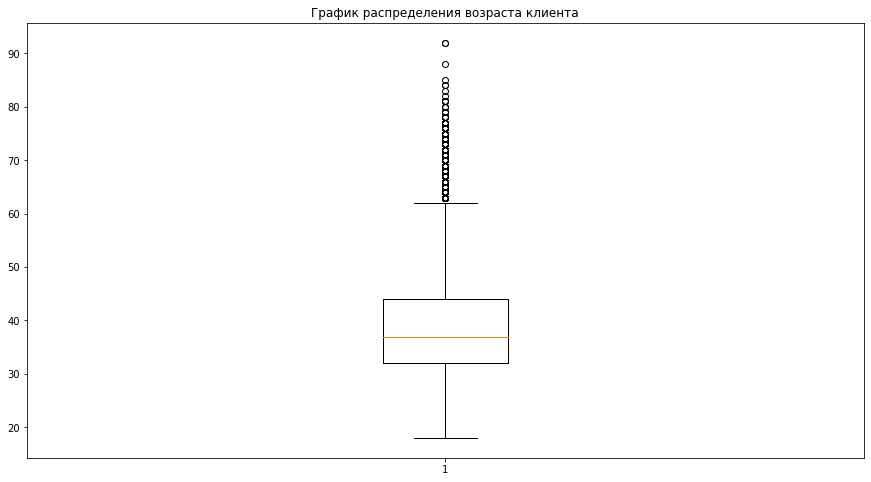

In [21]:
#Построим ящик с усами по возрасту по всему датафрейму
plt.figure(figsize=(15,8))
plt.boxplot(x=data['age'])
plt.title('График распределения возраста клиента')
plt.show()

По результатам можем сделать выводы:
1) самый *молодой* клиент - **18 лет**;\
2) самый *возрастной* клиент - **92 года**;\
3) *средний* возраст клиента - **37 года** (выбираем медианное значение, так как клиенты старше 65 лет являются *аномальными*);\
4) *чаще всего* встречаются клиенты в возрастном диапозоне **32-44 года**

Посмотрим, как распределен средний возраст клиентов в разрезе *статуса* клиента.

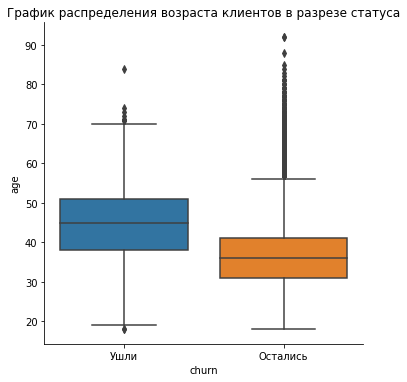

In [22]:
#Построим ящик с усами в разрезе статуса 
sns.catplot(data=data, x="churn", y="age", kind="box")
plt.title('График распределения возраста клиентов в разрезе статуса')
plt.show()

Дополним график распределения гистограмой распределения количества клиентов по возрасту в разрезе статуса клиентов.

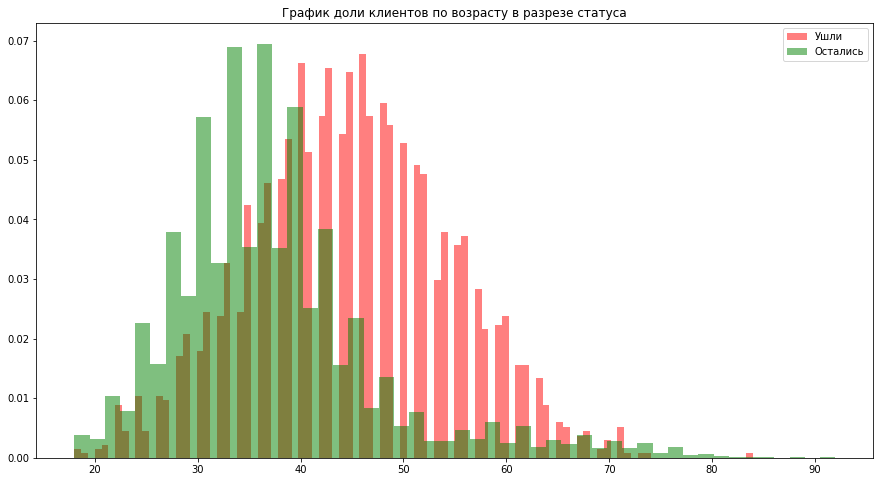

In [23]:
#Построим в общей системе координат две гистограммы : количество клиентов по возрасту, которые ушли и которые не ушли. 
#Данный график не покажет точное различие по количеству, так как выборки разных размеров, но покажет динамику изменения кол-ва
#от возраста.
#
plt.figure(figsize=(15,8))
plt.hist(data[data['churn'] =='Ушли']['age'], bins=100, alpha=0.5, color='red', density=True)
plt.hist(data[data['churn'] =='Остались']['age'], bins=50, alpha=0.5, color='green', density=True)
plt.title('График доли клиентов по возрасту в разрезе статуса')
plt.legend (('Ушли', 'Остались'))
plt.show()

По данным графика можем сделать предположение, что *средний возраст ушедших* и *оставшихся* клиентов **различается**. Клиенты, склонные к уходу в возрасте **38- 51 год**, а оставшиеся сотрудничать **30-42 года**. Теорию о том, что возраст клиентов по статусу отличается проверим далее по проекту.

Проранжируем так же возраст клиентов по группам:

*Меньше 18 лет* - подростки. Вряд ли банки разрешат выдачу кредитов, например, клиентам младше 18-ти лет. Но тем не менее, оставим данну группу для проверки случайных ошибочных, аномальных решений банка по обсуживанию клиентов не достигших совершенолетия.\
*От 18 до 35* - Молодые люди.\
*От 35 до 55* - Взрослые люди.\
*Более 55 лет* - пожилые люди. 

In [24]:
#Создадим функцию, которая будет возвращать группу по возрасту
def age_group(row):
        if row < 18:
            return  'Подросток'
        elif 18 <= row <= 35:
            return  'Молодой'
        elif 35 < row <= 55:
            return  'Взрослый'
        else:
            return 'Пожилой'
        
#Применим функцию и вернем результат группы в новый столбец         
data['age_group'] = data['age'].apply(age_group)     

In [25]:
#Построим круговую диаграмму для просмотра долей
data_age_pie = data.pivot_table(index=['age_group', 'churn'], values='user_id', aggfunc='count').\
    reset_index().\
    sort_values(by='user_id', ascending=False)
data_age_pie.columns = ['age_group', 'churn', 'qty']    
fig = px.pie(data_age_pie, values='qty', names='age_group', title='Соотношение количества клиентов в разрезе группы возраста')
fig.show()

Итого, **половина** пользователей являются *взрослыми* людьми. Порядка **40%** - *молодые люди*, а *пожилых* всего **8 %**. Посмотрим на разбивку внутри каждой группы по статусу клиента. 

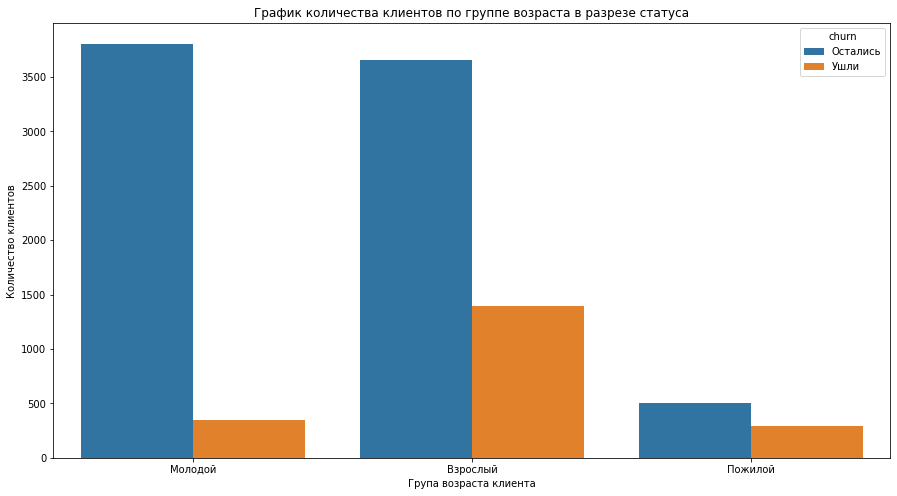

In [26]:
#Построим столбачатую гистограмму в разрезе статуса клиентов
plt.figure(figsize=(15,8))
sns.barplot(data=data_age_pie, x='age_group', y='qty', hue='churn')
plt.title('График количества клиентов по группе возраста в разрезе статуса')
plt.ylabel('Количество клиентов')
plt.xlabel('Група возраста клиента')
plt.show()

**Наибольшая** доля *ушедших* клиентов - *взрослые* и *пожилые* люди. Причем среди пожилых **более половины** пользователей склонны завершить сотрудничество с банком.

Проверим в таком же ключе баллы скоринга.

In [27]:
#вызовем метод describe и посчитаем медиану
print(data['score'].describe())
print()
print(f'Медианное значение бала скоринга клиентов: {data["score"].median()}')

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64

Медианное значение бала скоринга клиентов: 652.0


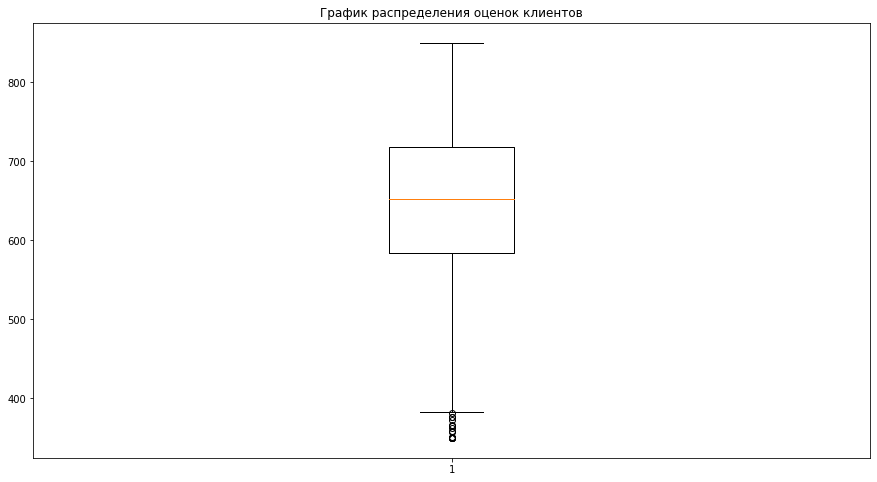

In [28]:
#Дополним ящиком с усами
plt.figure(figsize=(15,8))
plt.boxplot(x=data['score'])
plt.title('График распределения оценок клиентов')
plt.show()

Баллы *ниже* 400 являются редким явлением. *Средний* скоринговый балл клиентов - **652 балла**. *Наиболее распространеннные* баллы скоринга среди всех клиентов в диапозоне **584-718 баллов**. *Наименьший балл* - **350**. *Наибольший* - **850**. Посмотрим, какой средний балл скоринга в разрезе статуса клиентов.

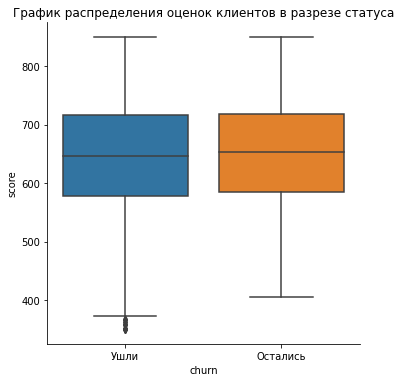

In [29]:
#Построим ящик с усами в разрезе статуса 
sns.catplot(data=data, x="churn", y="score", kind="box")
plt.title('График распределения оценок клиентов в разрезе статуса')
plt.show()

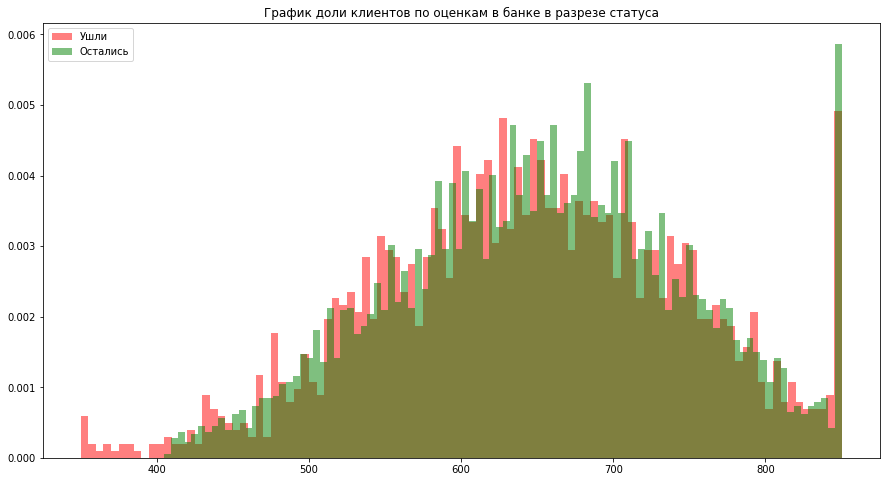

In [30]:
#Дополним график количества клиентов по оценкам в разрезе статуса
plt.figure(figsize=(15,8))
plt.hist(data[data['churn'] =='Ушли']['score'], bins=100, alpha=0.5, color='red', density=True)
plt.hist(data[data['churn'] =='Остались']['score'], bins=100, alpha=0.5, color='green', density=True)
plt.title('График доли клиентов по оценкам в банке в разрезе статуса')
plt.legend (('Ушли', 'Остались'))
plt.show()

На основе полученных данных *тяжело дать одназначное* предположение о взаимосвязи оценок скоринга и статуса клиента. *Средние оценки* **примерно равны**, но разброс **отличается**. Так же динамика изменения количества клиентов от роста баллов отличается, но не сильно. Данную теорию проверим далее по проекту. 

В интеренете присутствует информация, что скориноговый бал *ниже 300* является основанием не выдачи кредитов и более тщательной проверки платежеспособности клиента. 
300-600 является средним баллом, при котором банки при прочих равных условиях могут выдать кредиты. 
более 600 баллов считается оптимальным баллом для расширеннего обслуживания клиента. Сделаем ранжирование по данным критериям.

In [31]:
#Создадим функцию, которая будет возвращать группу по баллу скоринга
def score_group(row):
        if row < 300:
            return  'Низкий'
        elif 300 <= row <= 600:
            return  'Средний'
        else:
            return  'Высокий'
#применим функцию и в новой колонке укажем группу         
data['score_group'] = data['score'].apply(score_group)        

In [32]:
#Визуализируем
data_score_pie = data.pivot_table(index=['score_group', 'churn'], values='user_id', aggfunc='count').\
    reset_index().\
    sort_values(by='user_id', ascending=False)
data_score_pie.columns = ['score_group', 'churn', 'qty']    
fig = px.pie(data_score_pie, values='qty', names='score_group', title='Соотношение количества клиентов в разрезе группы балла скоринга')
fig.show()

На основе прошлого шага в исследовании, мы увидели, что оценок *ниже 300* в датасете **нет**. Данный график это подтвердил лишний раз.\
Почти **70%** пользователей имеют *высокую* оценку скоринга. остальные **30%** - сренднюю. Посмотрим, как изменится картина  в разрезе статуса клиентов.

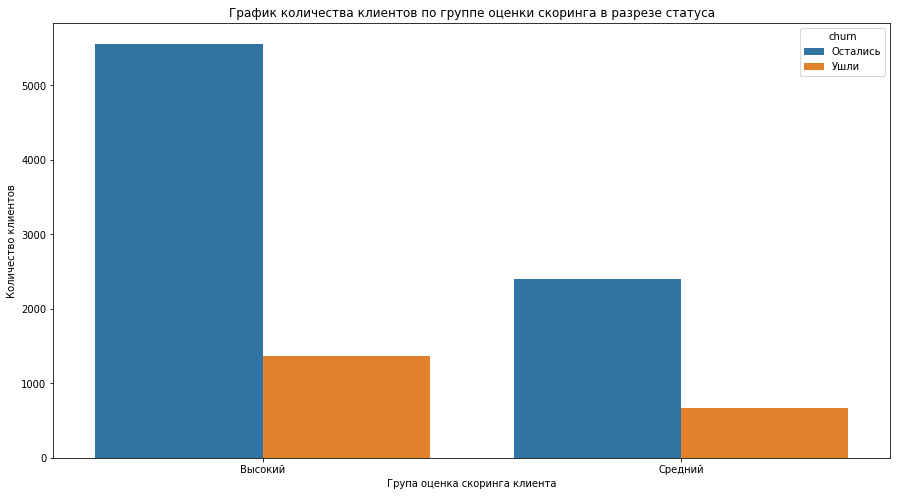

In [33]:
#Построим столбачатую гистограмму в разрезе статуса клиентов
plt.figure(figsize=(15,8))
sns.barplot(data=data_score_pie, x='score_group', y='qty', hue='churn')
plt.title('График количества клиентов по группе оценки скоринга в разрезе статуса')
plt.ylabel('Количество клиентов')
plt.xlabel('Група оценка скоринга клиента')
plt.show()

По данным графикам сложно сделать однозначный вывод о возможной взаимосвязи, доля ушедших среди этих двух групп примерно равны. Далее по проекту проверим данную гипотезу. 

Проанализируем средний уровень дохода клиентов.

In [34]:
print(data['estimated_salary'].describe())
print()
print(data['estimated_salary'].median())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

100193.915


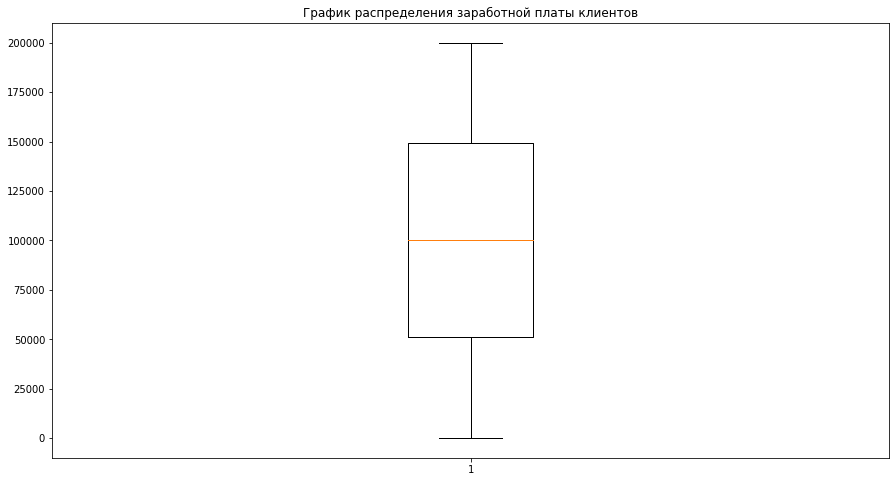

In [35]:
#Построим ящик с усами
plt.figure(figsize=(15,8))
plt.boxplot(x=data['estimated_salary'])
plt.title('График распределения заработной платы клиентов')
plt.show()

По данному исследованию можем заметить:

1) *Минимальный уровень дохода* клиентов: **199992.48** условных едениц;\
2) *Максимальный уровень доходов* клиентов: **11.58** условных едениц;\
3) Средний уровень дохода : **100090** условных едениц (берем именно среднюю, а не медиану, так как нет аномалий);\
4) наиболее часто встречается доход в диапозоне : **50000 - 150000** условных едениц.

Посмотрим на уровень заработной платы в разрезе статуса.

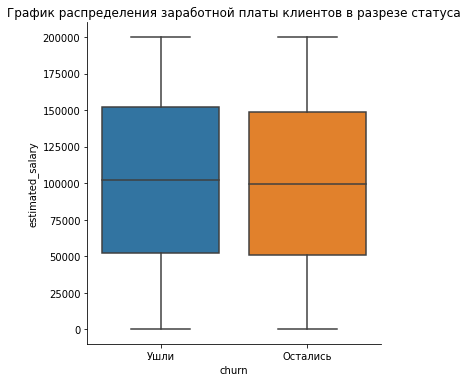

In [36]:
sns.catplot(data=data, x="churn", y="estimated_salary", kind="box")
plt.title('График распределения заработной платы клиентов в разрезе статуса')
plt.show()

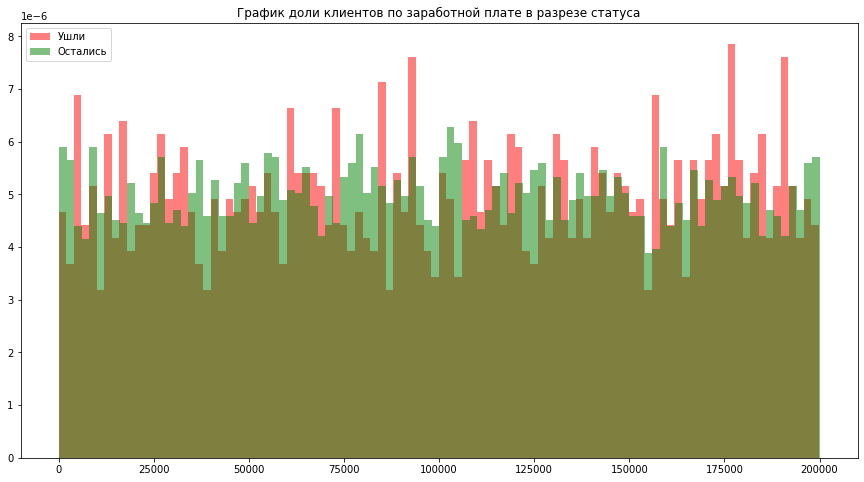

In [37]:
#Дополним график количества клиентов по заработной плате в разрезе статуса
plt.figure(figsize=(15,8))
plt.hist(data[data['churn'] == 'Ушли']['estimated_salary'], bins=100, alpha=0.5, color='red', density=True)
plt.hist(data[data['churn'] == 'Остались']['estimated_salary'], bins=100, alpha=0.5, color='green', density=True)
plt.title('График доли клиентов по заработной плате в разрезе статуса')
plt.legend(('Ушли', 'Остались'))
plt.show()

Как мы видим, средняя заработная плата в каждой из групп практичеки равна, а динамика изменения количества клиентов от уровня заработной платы так же не меняется. Можем сделать предположение, что *уровень заработной платы* **не влияет** на *статус* клиента. 

Посмотрим в разрезе группы по уровню заработной платы клиентов банка. На данный момент, средний уровень МРОТ по Ярославской области составляет порядка 15500 рублей. Данная группа людей будет называеться *бедными*. Уровень заработной платы *15500 - 45000* является *средним*. Всё, что выше - *Высоким уровнем дохода*. 

In [38]:
#Создадим функцию по аналогии с предыдущей
def salary_group(row):
        if row < 15500:
            return  'Бедный'
        elif 15500 <= row <= 45000:
            return  'Средний'
        else:
            return  'Высокий'
        
data['salary_group'] = data['estimated_salary'].apply(salary_group)      

In [39]:
#Визуализируем доли
data_salary_pie = data.pivot_table(index=['salary_group', 'churn'], values='user_id', aggfunc='count').\
    reset_index().\
    sort_values(by='user_id', ascending=False)
data_salary_pie.columns = ['salary_group', 'churn', 'qty']    
fig = px.pie(data_salary_pie, values='qty', names='salary_group', title='Соотношение количества клиентов в разрезе группы дохода')
fig.show()

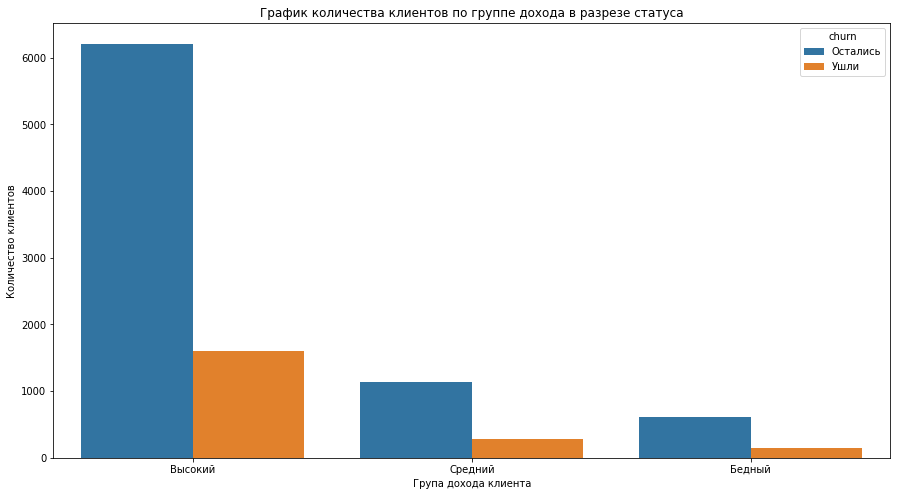

In [40]:
#Посмотрим в разрезе статуса клиента
plt.figure(figsize=(15,8))
sns.barplot(data=data_salary_pie, x='salary_group', y='qty', hue='churn')
plt.title('График количества клиентов по группе дохода в разрезе статуса')
plt.ylabel('Количество клиентов')
plt.xlabel('Група дохода клиента')
plt.show()

Дополнив исследование графиками в разрезе группы дохода, мы видим, что **наибольшая доля** клиентов имеют *выоский уровень дохода* и лишь **7%** клиентов являются *бедными*. В разрезе статуса клиентов, доля *ушедших* по каждой из групп примерно равны. Явной взаимосвязи данного параметра на процент ухода клиентов не видно. 

Проанализируем баланс клиентов. Так как ранее мы выяснили, что присутствуют *пропуски*, то посчитаем их долю.

In [41]:
#сделаем срез по данным. Сначала в переменную data_balance_na сохраним датасет, где в столбце баланса пропуск. Она будет нам нужна далее
data_balance_na = data[data['balance'].isna()]
#сделаем такой же срез, но уже очистив данные от пропусков и посчитаем долю пропусков
data_balance = data[~data['balance'].isna()]
print(f'Данных без указания баланса : {round((1-data_balance.shape[0]/data.shape[0])*100,2)}%')

Данных без указания баланса : 36.17%


36% достаточно большая доля, чтобы сделать срез по данным и проанализировать только тех, у кого баланс **есть**. Пропуск может означать отсутствие баланса на счёте клиента. Так же сделаем предположение, что отсутствие баланса свойственно только ушедшим клиентам. Проверим это ниже. 

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Хорошее предположение
</div>

Разделим анализ на два этапа : анализ клиентов, в графе которых есть баланс и у которых в столбце баланса пропуск.

In [42]:
#сгруппируем данные у которых есть баланс по статусу клиентов и посчитаем их количество, далее визуализируем. 
data_balance_plot = data_balance.pivot_table(index='churn', values='user_id', aggfunc='count').reset_index()
data_balance_plot = data_balance_plot.sort_values(by='user_id', ascending=False)
data_balance_plot.columns = ['churn', 'qty']
data_balance_plot['share'] = round(data_balance_plot['qty']/data_balance_plot['qty'].sum()*100,2)

In [43]:
fig = px.pie(data_balance_plot, values='qty', names='churn', title='Соотношение Оставшихся и Ушедших клиентов у которых есть баланс в банке')
fig.show()

Почти у **76%** клиентов, у которых *есть баланс*, остились сотрудничать с банком. Посмотрим на распределение баланса.

In [44]:
print(data_balance['balance'].describe())
print()
print(data_balance['balance'].median())

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

119839.69


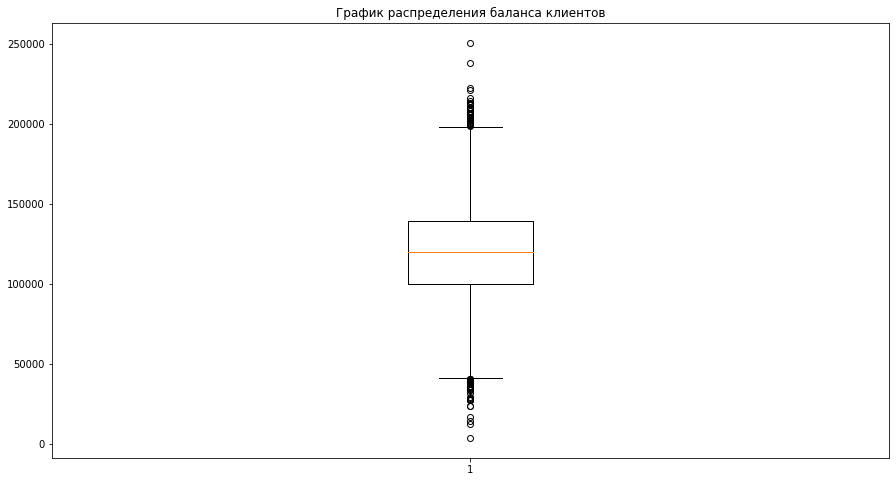

In [45]:
#Построим ящик с усами
plt.figure(figsize=(15,8))
plt.boxplot(x=data_balance['balance'])
plt.title('График распределения баланса клиентов')
plt.show()

Как мы видим, *средняя* и *медиана* практически не отличается, однако по графику распределения мы видим большое количество аномальных выбров : баланс *выше 200000* и *меньше 50000* являются выбросами. Чаще всего встречаются клиенты, чей баланс в диапозоне **100000 - 150000** условных едениц. Посмотрим на баланс клиентов в разрезе статуса клиентов. 

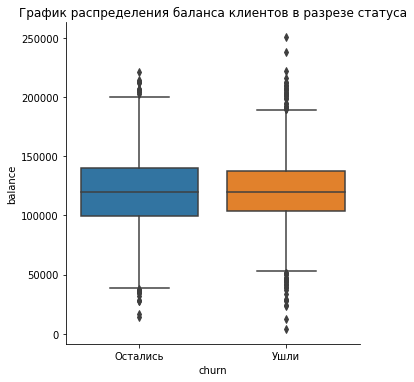

In [46]:
sns.catplot(data=data_balance, x="churn", y="balance", kind="box")
plt.title('График распределения баланса клиентов в разрезе статуса')
plt.show()

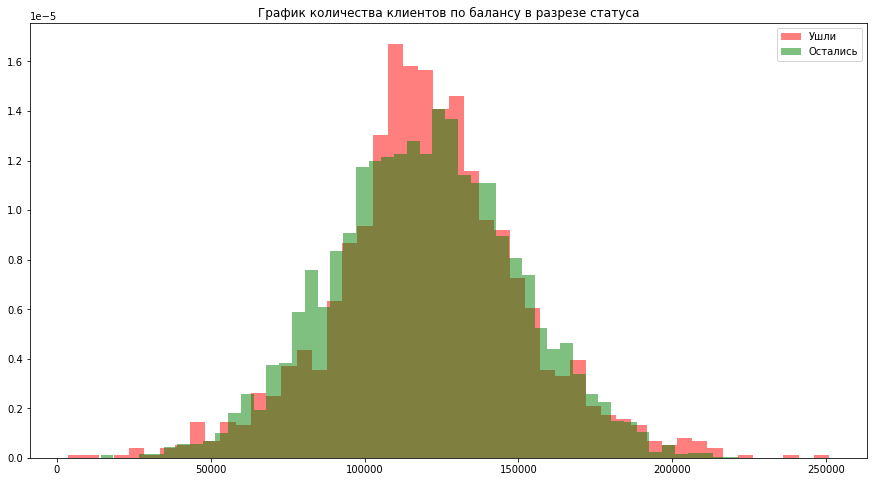

In [47]:
#Добавим график гистограмы
plt.figure(figsize=(15,8))
plt.hist(data[data['churn'] == 'Ушли']['balance'], bins=50, alpha=0.5, color='red', density=True)
plt.hist(data[data['churn'] == 'Остались']['balance'], bins=50, alpha=0.5, color='green', density=True)
plt.title('График количества клиентов по балансу в разрезе статуса')
plt.legend(('Ушли', 'Остались'))
plt.show()

Как мы видим, распределение баланса тех, кто *ушел* несколько отличается от тех, кто *остался*. Так же можем заметить, что аномальных выбросов довольно много именно у *ушедших*. Теперь проанализируем тех, у которых баланс отсутствует. 

In [48]:
data_balance_na = data_balance_na.pivot_table(index='churn', values='user_id', aggfunc='count').reset_index()
data_balance_na = data_balance_na.sort_values(by='user_id', ascending=False)
data_balance_na.columns = ['churn', 'qty']
data_balance_na['share'] = round(data_balance_na['qty']/data_balance_na['qty'].sum()*100,2)

In [49]:
fig = px.pie(data_balance_na, values='qty', names='churn', title='Соотношение Оставшихся и Ушедших клиентов у которых нет баланса в банке')
fig.show()

Среди тех, у кого баланса в банке **нет**, процент ушедших порядка **13.8%**, что на *10 % меньше*, чем доля ушедших, у кого баланс в банке **есть**. 

Посмотрим на взаимосвязь данных между собой:
1) Построим графики распределения взаимосвязей данных;\
2) Построим таблицу со значениями корреляции данных.

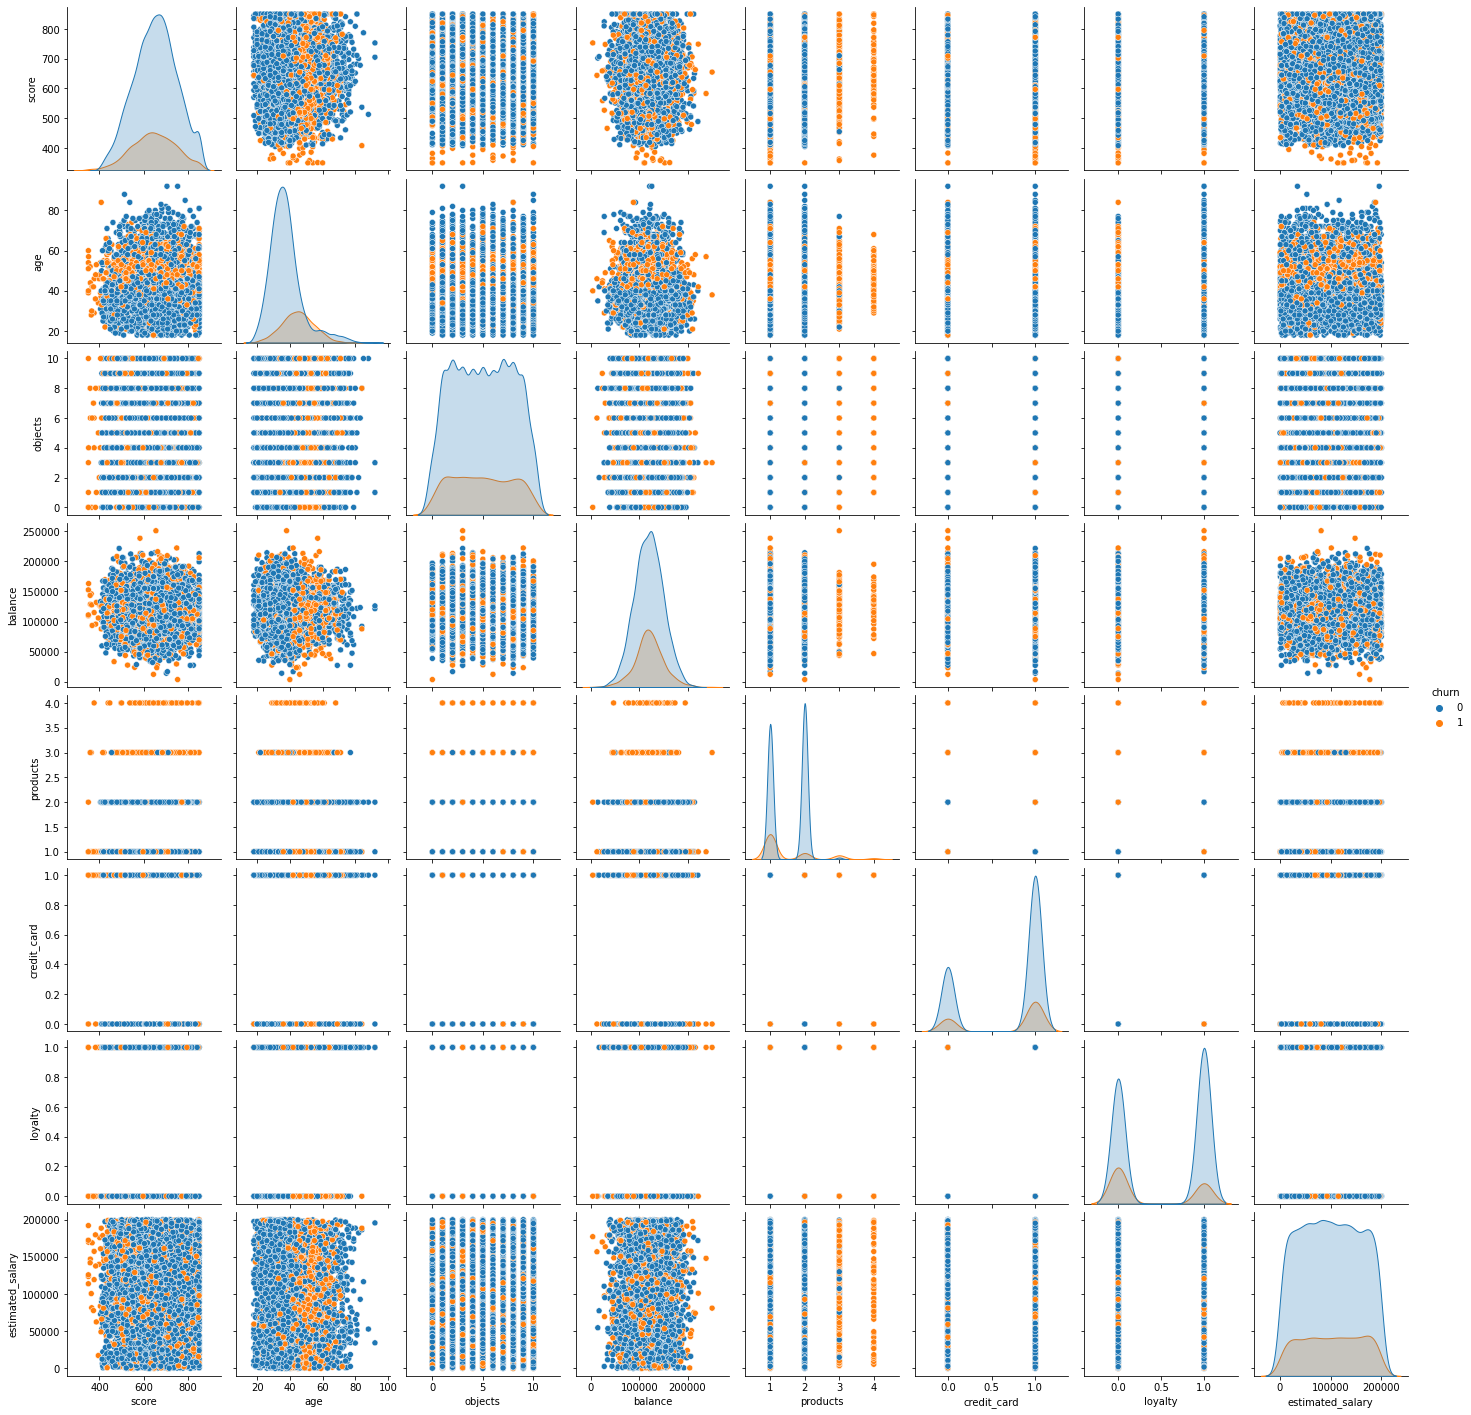

In [50]:
#Уберем колонку с кодом клиента 
data_corr = data_corr[data_corr.columns.drop('user_id')]
#Строим графики взаимосвязи между всеми параметрами
sns.pairplot(data_corr, hue='churn')
plt.show()

На основе данных графиков явной зависимости одного параметра от другого не наблюдается: нет графиков с нормальным распределением данных. Посчитаем корреляцию. 

In [51]:
#Переведем пол в двоичную систему методом get_dummies. 0 - женский пол, 1 - мужской пол. 
data_corr = pd.get_dummies(data_corr, columns= ['gender'], drop_first= True )

Для кодировки города создадим три колонки, которые бы возвращали True или False если название колонки соответсвует городу конкретного клиента. 

In [52]:
data_corr['city_yar'] = data_corr['city'].str.contains('Ярославль')
data_corr['city_rostov'] = data_corr['city'].str.contains('Ростов')
data_corr['city_rybinsk'] = data_corr['city'].str.contains('Рыбинск')

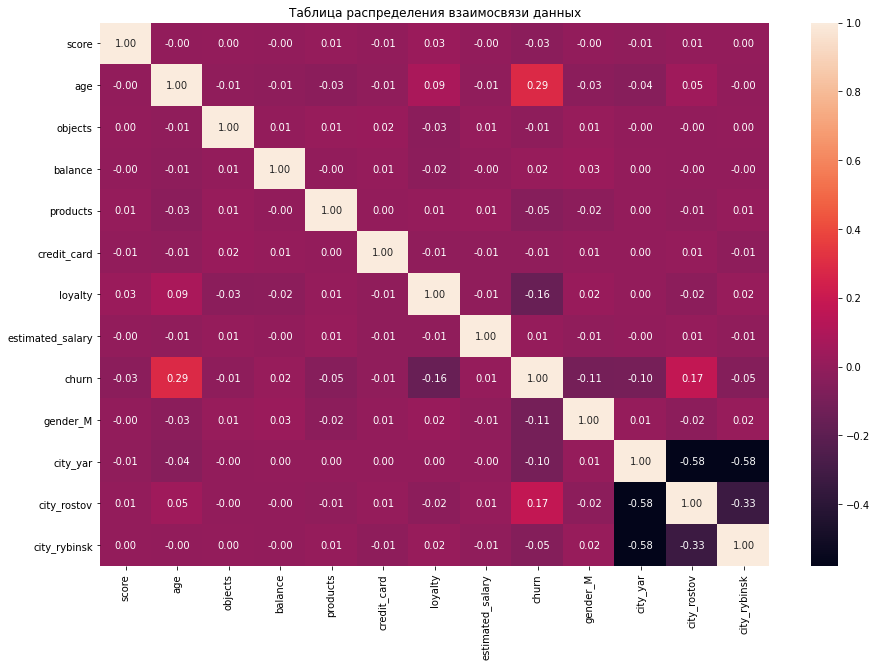

In [53]:
#Объявим новый датасет, скопируем названия колонок в названия строк и удалим данные кода пользователя, он не нужен. И заполним ячейки корреляцией.
data_corr = data_corr.corr()
plt.figure(figsize=(15,10))
#строим тепловую карту по значениям корреляции
sns.heatmap(data_corr, fmt='.2f', annot=True)
plt.title('Таблица распределения взаимосвязи данных')
plt.show()

Максимальное значение корреляции - **0.29**, что является верхней границей *слабой зависимости*. Она имеет положительное значение, значит, можем предположить, что *чем выше возраст, тем вероятнее всего, клиент уйдет*. Взаимосвязь возраста и изменение статуса клиента мы проверим в гиппотезе далее.\
Так же можно выделить потенциальную взаимосвязь между городом и статусом клиента. Клиенты из города *Ростов* наиболее склонны к уходу, нежели чем клиенты из других городо (**0.17** значение корреляции). Клиенты же из города *Рыбинска* наименее склонны к уходу.\
Стоит рассмотреть так же взаимосвязь активности и статуса клиента. Значение **-0.16**, означает, что связь всё ещё крайне слабая. Чем выше лояльность, тем меньше вероятность ухода клиента. Но это так же является лишь предположение, которую следует проверить.\
Так же просматривается небольшая зависимость между *полом* клиента и его *статусом*. Значение корреляции в **-0.11** говорит о том, что есть слабая, но всё же зависимость этих параметров: женщины наиболее склонны к уходу.\
Что касается остальных значений, то связь между ними крайне слабая и требует более детального изучения на предмет взаимосвязи. 

Проведя анализ данных, был выгружен датасет, приведены названия колонок к удобному формату, проведены замена названий категорий и введены новые.\
В процессе исследования *не были выявлены дубликаты*.
*Пропуски присутствовали* только в колонке *с уровнем баланса* клиентов. Было сделано предположение, что отсутствие информации означает отсутствие баланса конкретного клиента.

Порядка **20%** (2037 шт) клиентов банка ушли. Это достаточно большой показатель по результатам эффективности работы банка. 

Проанализировав каждый из фактор различия клиентов, были сделаны предположения:

1) Наибольшее число и доля **ушедших** клиентов в *городе Ростов Великий* - **814 клиентов**(8.14% от общего числа клиентов);\
2) Наибольшее число и доля **ушедших** клиентов  *женского пола* - **1139 клиентов**(11.39% от общего числа клиентов);\
3) Наименьшая доля *ушедших* наблюдается среди клиентов, **не имеющих** объекты в залоге, либо **имеющих 10** объектов;\
4) Клиенты, пользующиеся *тремя* и *четырмя* продуктами наиболее склонны к прекращению сотрудничества, нежели, чем клиенты, пользующиеся *двумя* продуктами;\
5) *Наличие кредитных карт* **не влияет** на желание клиента уйти из банка. Процентное соотношение *ушедших* и *оставшихся* клиентов примерно равна;\
6) Общее число клиентов *активных* и *не активных* примерно равно. Однако, процент *ушедших* среди *не активных* **выше**, чем у  *активных*;\
7) Клиенты, склонные к уходу в возрасте **38- 51 год**, а оставшиеся сотрудничать **30-42 года**. Теорию о том, что возраст клиентов по статусу отличается проверим далее по проекту. **Наибольшая** доля *ушедших* клиентов - *взрослые* и *пожилые* люди. Причем среди пожилых **более половины** пользователей склонны завершить сотрудничество с банком;\
8) *Тяжело дать одназначное* предположение о взаимосвязи оценок скоринга и статуса клиента. *Средние оценки* **примерно равны**, но разброс **отличается**. Так же динамика изменения количества клиентов от роста баллов отличается, но не сильно. Данную теорию проверим далее по проекту;\
9) *Уровень заработной платы* **не влияет** на *статус* клиента;\
10) Так как количество пропусков в значении *баланса* достаточно велико, сделать однозначный вывод о взаимосвязи данного фактора к уходу клиента из банка будет некорректным. Данный параметр можно более детаельно изучить после того, как получим разъяснения от заказщика о природе появления пропуска.

Данные по заработной плате, кол-ву продуктов, балансу, кол-ву объектов в собственности, возрасту и баллу скоринга между собой **не связаны**. 

Максимальное значение корреляции - **0.29**, что является верхней границей *слабой зависимости*. Она имеет положительное значение, значит, можем предположить, что *чем выше возраст, тем вероятнее всего, клиент уйдет*. Взаимосвязь возраста и изменение статуса клиента мы проверим в гиппотезе далее.\
Так же можно выделить потенциальную взаимосвязь между городом и статусом клиента. Клиенты из города *Ростов* наиболее склонны к уходу, нежели чем клиенты из других городо (**0.17** значение корреляции). Клиенты же из города *Рыбинска* наименее склонны к уходу.\
Стоит рассмотреть так же взаимосвязь активности и статуса клиента. Значение **-0.16**, означает, что связь всё ещё крайне слабая. Чем выше лояльность, тем меньше вероятность ухода клиента. Но это так же является лишь предположение, которую следует проверить.\
Так же просматривается небольшая зависимость между *полом* клиента и его *статусом*. Значение корреляции в **-0.11** говорит о том, что есть слабая, но всё же зависимость этих параметров: женщины наиболее склонны к уходу.\
Что касается остальных значений, то связь между ними крайне слабая и требует более детального изучения на предмет взаимосвязи. 

### Формулировка гипотез и проверка

На основе предыдущего шага проверим гипотезы о взаимосвязи некоторых факторов на изменение статуса клиента. Проверим три гипотезы. Но для удобства создадим функцию с проверкой каждой из гипотез.

In [54]:
#Создадим функцию, которая будет делать срез по датасету по группе "ушли" и "остались". В срезе будут учавствовать только колонки
#которы мы будем передавать функции с числовыми данными. Далее запускаем t-тест на проверку гипотезы.
def test(column):
    data_leaved = data[data['churn'] == 'Ушли'][column]
    data_saved = data[data['churn'] == 'Остались'][column]
    results =st.ttest_ind(data_leaved, data_saved, equal_var=False)
    alpha = 0.05
    print(results.pvalue) # вывод значения p-value на экран 
    if results.pvalue < alpha: # условный оператор с выводом строки с ответом
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
        

Для сравнения используем t-тест для сравнения средних двух независимых выборок. О равности дисперсий мы утверждать не можем, поэтому указываем это в нашей функции.

Далее проверим три гипотезы. Начнем с проверки взаимосвязи среднего уровня заработной платы на желание ухода клиента из банка. 

H_0: Уровень дохода ушедших клиентов равна уровню дохода оставшихся клиентов.\
H_1: Уровень дохода ушедших клиентов отличается от уровня дохода оставшихся клиентов.

In [55]:
#проводим тест
test('estimated_salary')

0.22892461305145798
Не получилось отвергнуть нулевую гипотезу


Таким образом, уровень дохода клиента **не зависит** от его желания прекратить сотрудничество с банком.

Проверим взаимосвязь возраста клиента на его желание уйти из банка. 

H_0: Возраст ушедших клиентов равен возрасту оставшихся клиентов.\
H_1: Возраст ушедших клиентов не равен возрасту оставшихся клиентов.

In [56]:
#проводим тест
test('age')

4.7127272656641046e-179
Отвергаем нулевую гипотезу


На основе теста можем сделать вывод о том, что *возраст клиента* **влияет** на его желание уйти из банка.

Более того, p_value составляет целых 4.7 пункта, что говорит о достаточно сильной связи. 

Проверим взаимосвязь балл скоринга клиента на его желание уйти из банка. 

H_0: Балл скоринга ушедших клиентов равен баллу оставшихся клиентов.\
H_1: Балл скоринга ушедших клиентов не равен баллу оставшихся клиентов.

In [57]:
#проводим тест
test('score')

0.008464728991832862
Отвергаем нулевую гипотезу


На основе теста можем сделать предположение, что *скоринговый бал* влияет на желание клиента уйти из банка. Однако, p_value составляет 0.08, что говорит о слабой разнице среднего балла.

Объеденив выводы в анализе данных и проведенных тестов, сформируем портрет клиента, склонного к уходу из банка.

<a id="final"></a>
### Финальный портрет клиента склонного к уходу из банка

Проведя анализ и тест различных гипотез, можем сформулировать портрет клиента, склонного к уходу:

С наибольшей вероятностью можно сказать, что клиент в возрастной категории 38-51 лет наиболее вероятнее всего уйдет из банка. 

Дополнительно изучив другие факторы, можно подтверидить или опровергнуть гипотезы о том, что клиент склонен к уходу , если он:

1) Проживает в городе Ростов;\
2) Женского пола;\
3) Пользуется тремя и более банковскими продуктами;

Некоторые факторы, такие как заработная плата и так далее, с большой вероятностю не влияют на статус клиента.\
В качестве улучшения ситуации, можно дать общие рекомендации банку:
1) Пересмотреть кредитные условия и стоимость обслуживания для жителей города Ростова (скидки, расширенные гарантии, льготы);\
2) Пересмотреть общий формат оценки платежеспособности и изменить корзину услуг банка для разной возрастной категории населения : для взрослых, молодых и пожилых людей предлагать различный банковский продукт;\
3) Давать различные бонусы для удержания клиентов, пользующиеся более двух продуктов : различные скидки на обслуживание, отсрочки, бонусы;\
4) Для клиентов женского пола придумать систему мотивации для удержания: беременным или недавно родившим предоставлять скидки/льготы на банковские продукты, либо придумать специальные условия. На праздничные дни (день матери, 8 марта и так далее) предоставлять различного рода бонусы, подарки и так далее. 

В качестве противовеса ушедшим, можем сделать предположение о картине клиента, не склонного к разрыву взаимоотношений с банком. Это поможет сформулировать дальнейший вектор анализа клиентов для долгосрочного сотрудничества и разработать проект мер для сокращения количества уходов.\
Клиент для долгосрочного сотрудничества: 
1) Живущий в Рыбинске;\
2) Клиент по возрастной категории - "молодой" (30-42 лет)\
3) Пользуется двумя банковскими продуктами;\
4) Имеет высокий скоринговый балл;\
5) Клиент мужского пола. 

Если часть выводов об идеальном клиенте являются результатом тестов, то остальные являются рекомендационными.